In [133]:
#Import Libraries
import pandas as pd
import os
from ydata_profiling import ProfileReport

#Currently, if you run this in codespaces, it doesn't have enough RAM to generate the report. 
skip_report_generation = True

In [134]:
df_historical = pd.read_csv('../Data/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
df_present = pd.read_csv('../Data/Police_Department_Incident_Reports__2018_to_Present.csv')

In [135]:
print(df_present['Incident Category'].unique())

['Recovered Vehicle' 'Larceny Theft' 'Assault' 'Lost Property'
 'Drug Violation' 'Malicious Mischief' 'Drug Offense' 'Non-Criminal'
 'Fraud' 'Warrant' 'Other Offenses' 'Robbery' 'Case Closure'
 'Other Miscellaneous' 'Stolen Property'
 'Offences Against The Family And Children' 'Other' 'Motor Vehicle Theft'
 'Traffic Collision' 'Suspicious Occ' 'Missing Person'
 'Disorderly Conduct' 'Weapons Carrying Etc' 'Rape' 'Burglary'
 'Fire Report' 'Arson' 'Vandalism' 'Suicide' 'Traffic Violation Arrest'
 'Courtesy Report' 'Forgery And Counterfeiting'
 'Miscellaneous Investigation' 'Weapons Offense' 'Embezzlement'
 'Vehicle Misplaced' 'Suspicious' nan 'Homicide' 'Prostitution'
 'Vehicle Impounded' 'Sex Offense' 'Liquor Laws'
 'Human Trafficking, Commercial Sex Acts' 'Gambling'
 'Motor Vehicle Theft?' 'Human Trafficking (A), Commercial Sex Acts'
 'Weapons Offence' 'Civil Sidewalks'
 'Human Trafficking (B), Involuntary Servitude']


In [136]:
print(df_historical['Category'].unique())

['ROBBERY' 'VEHICLE THEFT' 'ARSON' 'ASSAULT' 'TRESPASS' 'BURGLARY'
 'LARCENY/THEFT' 'WARRANTS' 'OTHER OFFENSES' 'DRUG/NARCOTIC'
 'SUSPICIOUS OCC' 'LIQUOR LAWS' 'VANDALISM' 'WEAPON LAWS' 'NON-CRIMINAL'
 'MISSING PERSON' 'FRAUD' 'SEX OFFENSES, FORCIBLE' 'SECONDARY CODES'
 'DISORDERLY CONDUCT' 'RECOVERED VEHICLE' 'KIDNAPPING'
 'FORGERY/COUNTERFEITING' 'PROSTITUTION' 'DRUNKENNESS' 'BAD CHECKS'
 'DRIVING UNDER THE INFLUENCE' 'LOITERING' 'STOLEN PROPERTY' 'SUICIDE'
 'BRIBERY' 'EXTORTION' 'EMBEZZLEMENT' 'GAMBLING' 'PORNOGRAPHY/OBSCENE MAT'
 'SEX OFFENSES, NON FORCIBLE' 'TREA']


In [137]:
pd.set_option('display.max_columns', 500)
df_historical.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,GENEVA AV / SANTOS ST,-122.420084,37.708311,POINT (-122.420084075249 37.7083109744362),NaN,NaN,9.0,NaN,NaN,NaN,8.0,309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,TURK ST / STJOSEPHS AV,-120.500000,90.000000,POINT (-120.50000000000001 90),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.500000,90.000000,POINT (-120.50000000000001 90),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,0 Block of SANJUAN AV,-122.436220,37.724377,POINT (-122.43622001281001 37.7243766140428),94.0,9.0,1.0,28.0,9.0,7.0,6.0,28861.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,400 Block of 10TH ST,-122.410541,37.770913,POINT (-122.410541166987 37.7709130566165),32.0,1.0,10.0,34.0,8.0,2.0,9.0,28853.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


In [138]:
df_historical = df_historical.drop(columns = ['DELETE - Fire Prevention Districts 2 2', 'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2','DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2','DELETE - 2017 Fix It Zones 2 2','DELETE - HSOC Zones 2 2', 'Civic Center Harm Reduction Project Boundary 2 2', 'Fix It Zones as of 2017-11-06  2 2','Fix It Zones as of 2018-02-07 2 2','CBD, BID and GBD Boundaries as of 2017 2 2','Central Market/Tenderloin Boundary 2 2','Central Market/Tenderloin Boundary Polygon - Updated 2 2','HSOC Zones as of 2018-06-05 2 2','OWED Public Spaces 2 2'])

In [139]:
pd.set_option('display.max_columns', 500)
df_present.head()
#convert historical date time to ['Incident DateTime'], resolution to match
#Delete df_present['Incident Date'] and df_present['Incident Year], Filed online, CAD Number, Report Type Code, Report Type Description, hist Descript, present incident subcategory, present incident description, Address, intersection, CNN, present police district, present supervisor district, present supervisor district 2012, present analysis neighborhood, present, ESNCAG, fix it zones
#rename [Incident Day of Week] to DayOfWeek, Incident Number to IncidntNum, Incident Category  to Category



,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2023/03/13 11:41:00 PM,2023/03/13,23:41,2023,Monday,2023/03/13 11:41:00 PM,125373607041,1253736,230167874,NaN,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023/03/01 05:02:00 AM,2023/03/01,05:02,2023,Wednesday,2023/03/11 03:40:00 PM,125379506374,1253795,236046151,NaN,II,Coplogic Initial,True,6374,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, >$950",Open or Active,NaN,NaN,Mission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023/03/13 01:16:00 PM,2023/03/13,13:16,2023,Monday,2023/03/13 01:17:00 PM,125357107041,1253571,220343896,NaN,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023/03/13 10:59:00 AM,2023/03/13,10:59,2023,Monday,2023/03/13 11:00:00 AM,125355107041,1253551,230174885,NaN,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023/03/14 06:44:00 PM,2023/03/14,18:44,2023,Tuesday,2023/03/14 06:45:00 PM,125402407041,1254024,230176728,NaN,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
df_present = df_present.drop(columns = ['Filed Online', 'CAD Number', 'Report Type Code', 'Report Type Description', 'Incident Subcategory', 'Incident Description', 'Intersection', 'CNN', 'Police District', 'Supervisor District', 'Supervisor District 2012', 'Analysis Neighborhood', 'ESNCAG - Boundary File', 'Central Market/Tenderloin Boundary Polygon - Updated','Civic Center Harm Reduction Project Boundary', 'HSOC Zones as of 2018-06-05', 'Invest In Neighborhoods (IIN) Areas'])

In [141]:
df_present = df_present.rename(columns={"Incident Date": "Date", "Incident Time": "Time", "Incident Day of Week":"DayOfWeek","Incident Number":"IncidntNum","Incident Category":"Category","Latitude":"Y","Longitude":"X"})

In [142]:
#drop null coordinates, incident id, pdid, row id, Analysis Neighborhoods 2 2, Areas of Vulnerability, 2016 2 2, SF Find Neighborhoods 2 2,pd district, incident datetime, incident year, Report Datetime
#rename current police districts and current supervisor districts to remove the 2 2, location to point, neighborhoods 2 to neighborhoods

In [143]:
df_historical.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,"Areas of Vulnerability, 2016 2 2",Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,GENEVA AV / SANTOS ST,-122.420084,37.708311,POINT (-122.420084075249 37.7083109744362),NaN,NaN,9.0,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,TURK ST / STJOSEPHS AV,-120.500000,90.000000,POINT (-120.50000000000001 90),NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.500000,90.000000,POINT (-120.50000000000001 90),NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,0 Block of SANJUAN AV,-122.436220,37.724377,POINT (-122.43622001281001 37.7243766140428),94.0,9.0,1.0,28.0,1.0,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,400 Block of 10TH ST,-122.410541,37.770913,POINT (-122.410541166987 37.7709130566165),32.0,1.0,10.0,34.0,2.0,32.0


In [144]:
df_present = df_present.drop(columns = ['Incident ID','Row ID','Incident Datetime','Incident Year','Report Datetime'])
df_historical = df_historical.drop(columns = ['PdId','Analysis Neighborhoods 2 2','Areas of Vulnerability, 2016 2 2','SF Find Neighborhoods 2 2','PdDistrict'])

In [145]:
#drop Historical descript and historical address
df_historical = df_historical.drop(columns = ['Descript','Address'])
df_historical = df_historical.rename(columns = {'location':'Point','Current Police Districts 2 2':'Current Police Districts','Current Supervisor Districts 2 2':'Current Supervisor Districts','Neighborhoods 2':'Neighborhoods'})

In [146]:
df_historical.isna().sum()

IncidntNum                         0
Incident Code                      0
Category                           0
DayOfWeek                          0
Date                               0
Time                               0
Resolution                         0
X                                  0
Y                                  0
Point                              0
Current Police Districts        1081
Current Supervisor Districts     647
Neighborhoods                   5967
dtype: int64

In [147]:
df_present.isna().sum()

Date                                0
Time                                0
DayOfWeek                           0
IncidntNum                          0
Incident Code                       0
Category                          697
Resolution                          0
Y                               42367
X                               42367
Point                           42367
Neighborhoods                   57917
Current Supervisor Districts    42497
Current Police Districts        43205
dtype: int64

In [148]:
sets = [df_present, df_historical]
df_crime = pd.concat(sets)


In [149]:
df_crime = df_crime.drop(columns = ['Current Supervisor Districts', 'Current Police Districts'])


In [150]:
df_crime = df_crime.dropna(subset=['X','Y'])

In [151]:
df_crime.isna().sum()

Date                 0
Time                 0
DayOfWeek            0
IncidntNum           0
Incident Code        0
Category           683
Resolution           0
Y                    0
X                    0
Point                0
Neighborhoods    21517
dtype: int64

In [152]:
# Keep all related crimes in the Category column
columns =['Larceny Theft', 'Assault', 'Robbery', 'Stolen Property', 'Motor Vehicle Theft', 'Burglary', 'Motor Vehicle Theft?', 
'Human Trafficking (A), Commercial Sex Acts', 'Human Trafficking, Commercial Sex Acts', 'Human Trafficking (B) Involuntary Servitude', 
                'Rape', 'ROBBERY', 'VEHICLE THEFT', 'ASSAULT', 'BURGLARY', 'LARCENY/THEFT', 'KIDNAPPING', 'STOLEN PROPERTY',
               'SEX OFFENSES, FORCIBLE']
df_crime = df_crime[df_crime['Category'].isin(columns)]


In [153]:
df_crime['Category'].unique()

array(['Assault', 'Rape', 'Larceny Theft', 'Robbery', 'Burglary',
       'Motor Vehicle Theft', 'Stolen Property',
       'Human Trafficking, Commercial Sex Acts', 'Motor Vehicle Theft?',
       'Human Trafficking (A), Commercial Sex Acts', 'ROBBERY',
       'VEHICLE THEFT', 'ASSAULT', 'BURGLARY', 'LARCENY/THEFT',
       'SEX OFFENSES, FORCIBLE', 'KIDNAPPING', 'STOLEN PROPERTY'],
      dtype=object)

In [154]:
# Replace similar crimes 

df_crime['Category'] = df_crime['Category'].apply(lambda x: x.replace('Human Trafficking (A), Commercial Sex Acts', 'Kidnapping'))
df_crime['Category'] = df_crime['Category'].apply(lambda x: x.replace('Human Trafficking, Commercial Sex Acts', 'Kidnapping'))
df_crime['Category'] = df_crime['Category'].apply(lambda x: x.replace('Human Trafficking (B), Involuntary Servitude', 'Kidnapping'))
df_crime['Category'] = df_crime['Category'].apply(lambda x: x.replace('Motor Vehicle Theft?', 'Vehicle Theft'))
df_crime['Category'] = df_crime['Category'].apply(lambda x: x.replace('Motor Vehicle Theft', 'Vehicle Theft'))
df_crime['Category'] = df_crime['Category'].apply(lambda x: x.replace('Rape', 'Assault'))
df_crime['Category'] = df_crime['Category'].apply(lambda x: x.replace('Larceny Theft', 'Theft'))
df_crime['Category'] = df_crime['Category'].apply(lambda x: x.replace('SEX OFFENSES, FORCIBLE', 'ASSAULT'))
df_crime['Category'] = df_crime['Category'].apply(lambda x: x.replace('LARCENY/THEFT', 'THEFT'))

In [155]:
df_crime['Category'].unique()

array(['Assault', 'Theft', 'Robbery', 'Burglary', 'Vehicle Theft',
       'Stolen Property', 'Kidnapping', 'ROBBERY', 'VEHICLE THEFT',
       'ASSAULT', 'BURGLARY', 'THEFT', 'KIDNAPPING', 'STOLEN PROPERTY'],
      dtype=object)

In [156]:
# Make the crime categories the same
df_crime['Category'] = df_crime['Category'].str.upper()

In [157]:
df_crime['Category'].unique()

array(['ASSAULT', 'THEFT', 'ROBBERY', 'BURGLARY', 'VEHICLE THEFT',
       'STOLEN PROPERTY', 'KIDNAPPING'], dtype=object)

In [158]:
# Rename X, Y to longitude and latitude
df_crime = df_crime.rename(columns={'Y': 'Latitude', 'X': 'Longitude'})

In [159]:
# Convert to datetime
df_crime['Date'] = pd.to_datetime(df_crime['Date'])

# Add year column
df_crime['Year'] = df_crime['Date'].dt.year

In [160]:
# Spring - March to May
# Summer - June to August
# Autumn - September to November
# Winter - December to February

df_crime['Month'] = df_crime['Date'].dt.month

# add Season column

def map_to_season(month_number):
    if 3 <= month_number <= 5:
        return 'Spring'
    elif 6 <= month_number <= 8:
        return 'Summer'
    elif 9 <= month_number <= 11:
        return 'Fall'
    else:
        return 'Winter'

df_crime['Season'] = df_crime['Month'].apply(map_to_season)

df_crime = df_crime.drop(columns=['Month'])

In [161]:
from pandas.tseries.holiday import USFederalHolidayCalendar
calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start=df_crime['Date'].min().date(), end=df_crime['Date'].max().date())
df_crime['isHoliday'] = df_crime['Date'].dt.date.isin(holidays)

print(df_crime['isHoliday'].value_counts())

/var/folders/lz/lmj60ph903gfwdyxb3sgf12m0000gn/T/ipykernel_45637/4135607568.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df_crime['isHoliday'] = df_crime['Date'].dt.date.isin(holidays)


False    1309624
True         220
Name: isHoliday, dtype: int64


In [162]:
# add timeofday column
def map_to_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_crime['Time'] = pd.to_datetime(df_crime['Time'])
df_crime['Hour'] = df_crime['Time'].dt.hour
df_crime['TimeOfDay'] = df_crime['Hour'].apply(map_to_time)

# Drop the 'Hour' column
df_crime = df_crime.drop(columns=['Hour'])

# Removes the date before the time: "2023-10-22 17:50:00" to "17:50:00"
df_crime['Time'] = df_crime['Time'].astype(str).str.split().str[-1]

In [163]:
# add isWeekend column
def weekend_or_not(day):
    return day == "Sunday" or day == "Saturday"

df_crime['isWeekend'] = df_crime['DayOfWeek'].apply(weekend_or_not)


In [164]:
# Rearrange column names for readability
df_crime = df_crime[['Category', 'IncidntNum', 'Incident Code', 'Date', 'Time', 'Year', 'DayOfWeek', 'isWeekend', 'TimeOfDay', 'Season', 'isHoliday', 'Longitude', 'Latitude', 'Point', 'Neighborhoods']]

In [165]:
df_crime.head()

,Category,IncidntNum,Incident Code,Date,Time,Year,DayOfWeek,isWeekend,TimeOfDay,Season,isHoliday,Longitude,Latitude,Point,Neighborhoods
9,ASSAULT,230182844,4134,2023-03-11,14:00:00,2023,Saturday,True,Afternoon,Spring,False,-122.454285,37.772895,POINT (-122.45428511766733 37.772895177200766),NaN
13,ASSAULT,230187101,4134,2023-03-16,17:30:00,2023,Thursday,False,Evening,Spring,False,-122.401324,37.762290,POINT (-122.40132418490647 37.76228996810526),54.0
87,ASSAULT,220435590,4134,2022-07-02,22:53:00,2022,Saturday,True,Night,Summer,False,-122.390020,37.719298,POINT (-122.39001968579463 37.719298464887245),88.0
221,ASSAULT,210426383,4134,2021-07-07,08:18:00,2021,Wednesday,False,Morning,Summer,False,-122.418594,37.753837,POINT (-122.41859394629981 37.753836586731786),53.0
236,ASSAULT,210345909,4134,2021-06-04,09:40:00,2021,Friday,False,Morning,Summer,False,-122.419739,37.785893,POINT (-122.41973873477666 37.78589290013101),20.0


In [166]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def plot_heatmap(data):
    mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
    plt.figure(figsize=(10, 3))
    heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG', mask=mask)
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
    plt.show()
    
def plot_histogram(data, column):
    sns.histplot(data=data, x=column, kde=True, color='purple')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    sns.despine()
    plt.show()

/var/folders/lz/lmj60ph903gfwdyxb3sgf12m0000gn/T/ipykernel_45637/2824851745.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
/var/folders/lz/lmj60ph903gfwdyxb3sgf12m0000gn/T/ipykernel_45637/2824851745.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
/var/folders/lz/lmj60ph903gfwdyxb3sgf12m0000gn/T/ipykernel_45637/2824851745.py:7: FutureWarning: The default value of numeric_only i

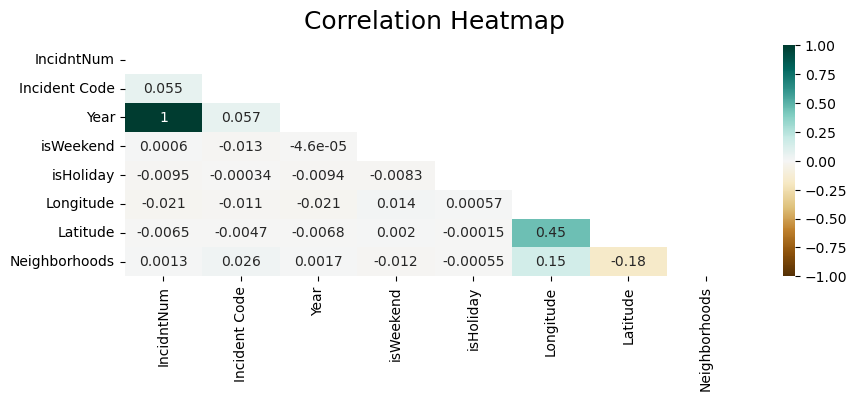

In [167]:
plot_heatmap(df_crime)


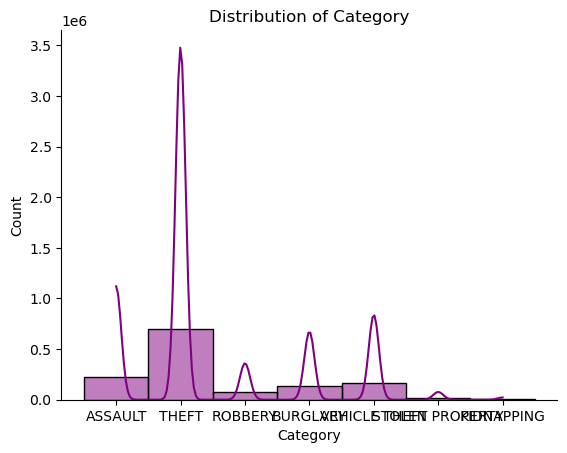

In [168]:
plot_histogram(df_crime, 'Category')

In [170]:
df_crime= pd.get_dummies(df_crime, columns = ['DayOfWeek', 'TimeOfDay','Season'])
df_crime["isHoliday"] = df_crime["isHoliday"].astype(int)
df_crime["isWeekend"] = df_crime["isWeekend"].astype(int)
df_crime.head()

,Category,IncidntNum,Incident Code,Date,Time,Year,isWeekend,isHoliday,Longitude,Latitude,Point,Neighborhoods,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,TimeOfDay_Afternoon,TimeOfDay_Evening,TimeOfDay_Morning,TimeOfDay_Night,Season_Fall,Season_Spring,Season_Summer,Season_Winter
9,ASSAULT,230182844,4134,2023-03-11,14:00:00,2023,1,0,-122.454285,37.772895,POINT (-122.45428511766733 37.772895177200766),NaN,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
13,ASSAULT,230187101,4134,2023-03-16,17:30:00,2023,0,0,-122.401324,37.762290,POINT (-122.40132418490647 37.76228996810526),54.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
87,ASSAULT,220435590,4134,2022-07-02,22:53:00,2022,1,0,-122.390020,37.719298,POINT (-122.39001968579463 37.719298464887245),88.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
221,ASSAULT,210426383,4134,2021-07-07,08:18:00,2021,0,0,-122.418594,37.753837,POINT (-122.41859394629981 37.753836586731786),53.0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
236,ASSAULT,210345909,4134,2021-06-04,09:40:00,2021,0,0,-122.419739,37.785893,POINT (-122.41973873477666 37.78589290013101),20.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [130]:

df_crime= pd.get_dummies(df_crime, columns = ['Season'])

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [172]:

categoryColumn = df_crime.Category

features = ['Longitude', 'Latitude']


X = pd.get_dummies(df_crime[features])


train_X, train_val_X, train_y, train_val_y = train_test_split(X,categoryColumn,random_state = 1)

In [173]:
model = RandomForestClassifier(n_estimators= 100, max_depth= 15, random_state=1)
model.fit(train_X,train_y)
predictions = model.predict(train_val_X)

In [184]:
print(predictions)


['THEFT' 'THEFT' 'THEFT' ... 'THEFT' 'ASSAULT' 'THEFT']


In [179]:

mae = mean_absolute_error(train_val_y,predictions)

ValueError: could not convert string to float: 'BURGLARY'